Following Deneve and Machens, a leaky integrate and fire neuron is given by

$\dot{V}(t) = -V(t) + \Gamma c(t) - \omega o(t)$

$c(t) = \dot{x}(t) + x(t)$

$o(t) = \sum_i \delta(t - t_i)$

Spike when $V(t) > T$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

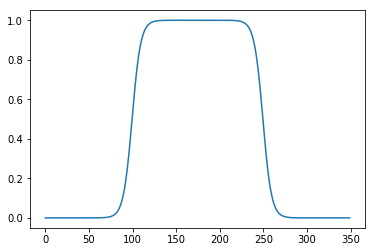

In [20]:
def sigmoid(x, tau):
    return 1.0 / (np.exp(-x * tau) + 1.0)

def smoothRekt(L0, L1, LT, tau):
    x = np.linspace(-2, 2, LT)
    y0 = np.zeros(L0)
    y1 = sigmoid(x, tau)
    y2 = np.ones(L1)
    y3 = sigmoid(x, -tau)
    y4 = np.zeros(L0)
    
    return np.hstack((y0,y1,y2,y3,y4))

inp1 = smoothRekt(50, 50, 100, 5)
plt.figure()
plt.plot(inp1)

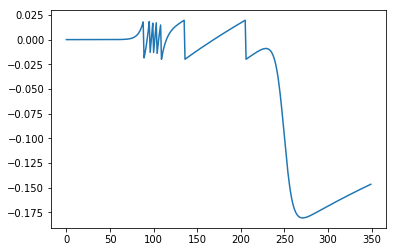

In [38]:
def V_Next(V, x1, x0, G, W, T, dt):
    cdt = x1 * dt + x1 - x0
    #cdt = x1*dt
    
    Vnew = V - V*dt + G * cdt
    if Vnew > T:
        Vnew -= W
    return Vnew
    
V = 0
VHist = [V]
G = 0.2
W = G*G
T = G*G/2

for i in range(1, len(inp1)):
    V = V_Next(V, inp1[i], inp1[i-1], G, W, T, 1.0 / 350)
    VHist.append(V)
    
plt.figure()
plt.plot(VHist)